## Tidy Data Principles and Transformation

### Why Tidy Data is Important:
In this analysis, I applied the principles of tidy data to transform the dataset. Initially, the dataset was in a wide format with separate columns for each sport and medal type. After melting the dataset, each row now represents one observation of an athlete, sport, and medal type. This structure makes it easy to analyze, visualize, and manipulate the data.

### Step-by-Step Explanation

1. **Data Transformation (Tidy Data Principles)**:
   I used `pandas.melt()` to convert the data from wide format to long format. This allows each variable (athlete name, sport, medal type) to be represented in its own column, making the data easier to analyze.

In [73]:
import pandas as pd

# Load the dataset
df = pd.read_csv('olympics_08_medalists.csv')

# Melt the dataframe
df_melted = pd.melt(df, id_vars=['medalist_name'], var_name='sport', value_name='medal')

# Check the first few rows of the melted data
df_melted.head()


,medalist_name,sport,medal
0,Aaron Armstrong,male_archery,NaN
1,Aaron Peirsol,male_archery,NaN
2,Abdullo Tangriev,male_archery,NaN
3,Abeer Abdelrahman,male_archery,NaN
4,Abhinav,male_archery,NaN


2. **Data Cleaning**:
   I cleaned the data by removing rows with missing values using `dropna()`. This ensures that the dataset only contains relevant rows for analysis.

In [74]:
# Drop rows where the medal value is NaN
df_melted = df_melted.dropna(subset=['medal'])

# Check the first few rows again
df_melted.head()


,medalist_name,sport,medal
177,Bair Badënov,male_archery,bronze
676,Ilario Di Buò,male_archery,silver
682,Im Dong-hyun,male_archery,gold
760,Jiang Lin,male_archery,bronze
920,Lee Chang-hwan,male_archery,gold


In [75]:
# Ensure the medal column contains proper categorical values
df_melted['medal'] = df_melted['medal'].str.strip().str.lower()

# Check the unique medal values
df_melted['medal'].unique()


array(['bronze', 'silver', 'gold'], dtype=object)

3. **Visualization 1 – Medal Count by Sport and Medal Type**:
   This visualization shows the total medal counts by sport, categorized by medal type (gold, silver, bronze). It helps to compare how different sports perform in terms of medals.


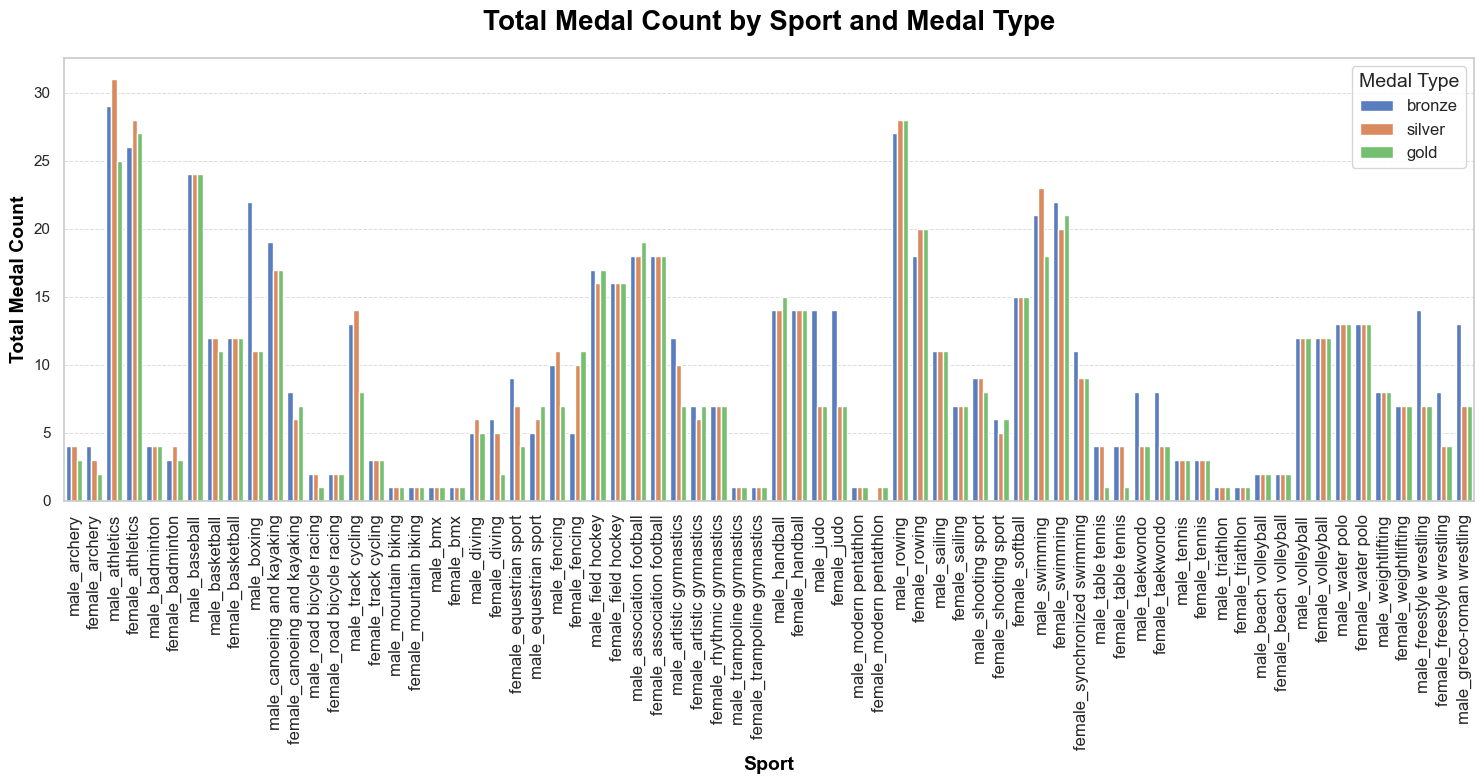

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for total medal counts by sport and medal type
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid", palette="muted")

# Create the bar plot
bar_plot = sns.countplot(data=df_melted, x='sport', hue='medal')

# Title and labels with better font choices
bar_plot.set_title('Total Medal Count by Sport and Medal Type', fontsize=20, weight='bold', color='black', pad=20)
bar_plot.set_xlabel('Sport', fontsize=14, weight='bold', color='black')
bar_plot.set_ylabel('Total Medal Count', fontsize=14, weight='bold', color='black')

# Rotate x labels for readability
plt.xticks(rotation=90, fontsize=12)

# Adjust the legend for clarity
plt.legend(title='Medal Type', fontsize=12, title_fontsize=14)

# Add gridlines for the y-axis to improve readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Make sure everything fits
plt.tight_layout()
plt.show()


4. **Visualization 2 – Top 10 Athletes by Medal Count**:
   This chart displays the top 10 athletes with the most medals, split by medal type. It helps to identify the most decorated athletes and their distribution of medal types.


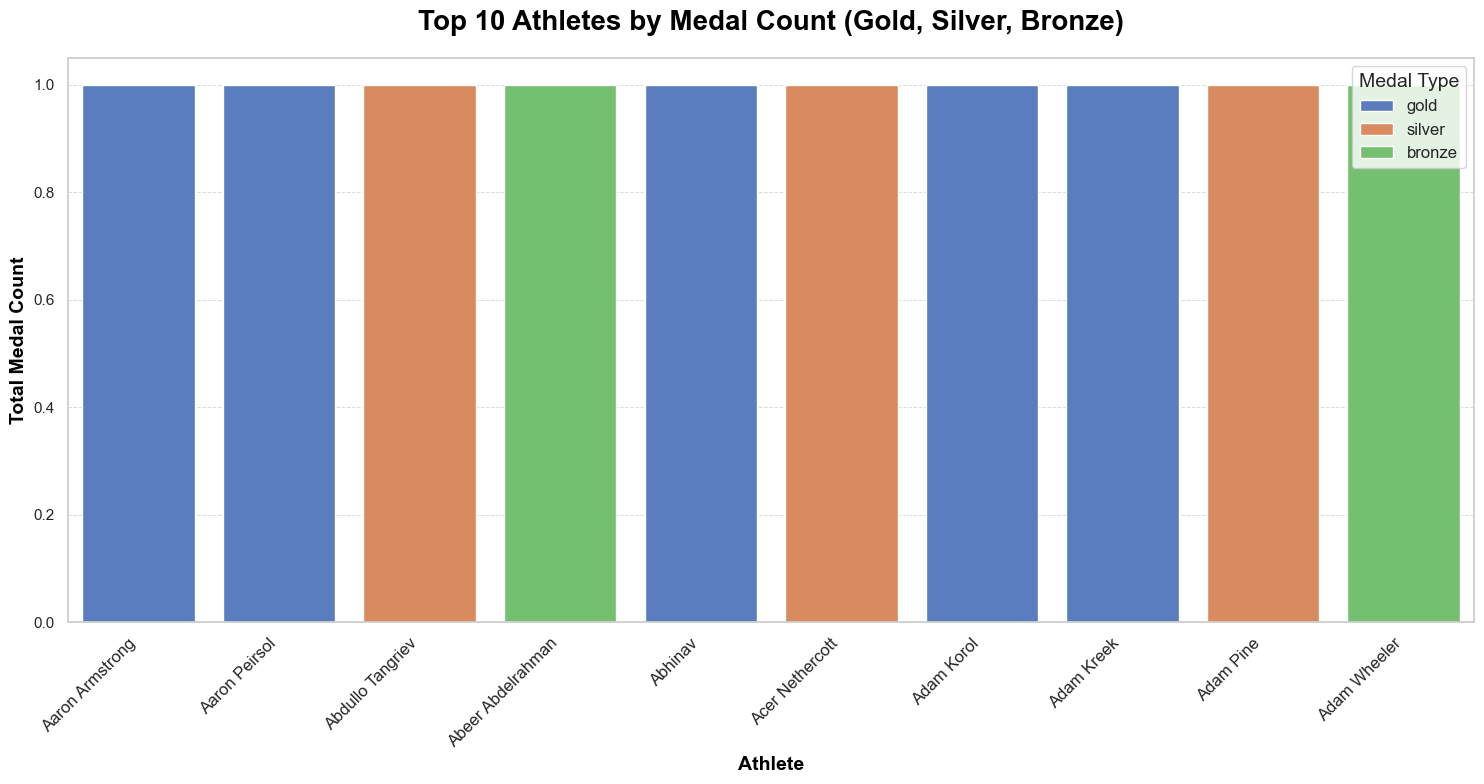

In [77]:
# Grouping the data by 'medalist_name' and 'medal' and then counting the occurrences of each medal type
df_medal_counts = df_melted.groupby(['medalist_name', 'medal']).size().reset_index(name='medal_count')

# Get the top 10 athletes by total medal count
top_athletes = df_medal_counts.groupby('medalist_name')['medal_count'].sum().nlargest(10).index
df_top_athletes = df_medal_counts[df_medal_counts['medalist_name'].isin(top_athletes)]

# Set the figure size and style for better visualization
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid", palette="muted")

# Create the count plot for the top 10 athletes by medal type
athlete_plot = sns.barplot(data=df_top_athletes, x='medalist_name', y='medal_count', hue='medal')

# Title and labels with better font choices
athlete_plot.set_title('Top 10 Athletes by Medal Count (Gold, Silver, Bronze)', fontsize=20, weight='bold', color='black', pad=20)
athlete_plot.set_xlabel('Athlete', fontsize=14, weight='bold', color='black')
athlete_plot.set_ylabel('Total Medal Count', fontsize=14, weight='bold', color='black')

# Rotate x labels for readability
plt.xticks(rotation=45, ha="right", fontsize=12)

# Adjust the legend for clarity
plt.legend(title='Medal Type', fontsize=12, title_fontsize=14)

# Add gridlines for the y-axis to improve readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Adjust layout for better fitting
plt.tight_layout()
plt.show()



5. **Pivot Table**:
   The pivot table summarizes the total count of each medal type (gold, silver, bronze) for every sport, allowing for a quick overview of the distribution of medals.


In [78]:
# Create a pivot table to aggregate total medals by sport and medal type
pivot_table = df_melted.pivot_table(index='sport', columns='medal', aggfunc='size', fill_value=0)

# Display the pivot table
pivot_table


medal,bronze,gold,silver
sport,,,
female_archery,4,2,3
female_artistic gymnastics,7,7,6
female_association football,18,18,18
female_athletics,26,27,28
female_badminton,3,3,4
...,...,...,...
male_trampoline gymnastics,1,1,1
male_triathlon,1,1,1
male_volleyball,12,12,12


### Conclusion:
By applying tidy data principles, I reshaped and cleaned the dataset, allowing for easier analysis. The visualizations highlight key insights into the distribution of medals by sport and athlete. The pivot table provides a clear summary of medal counts for each sport.